# Photo-z multiplicative bias: $1+\delta(z)$

This notebook computes the photo-z contribution to the multiplicative bias on the lensing signals for DES Y1 clusters. At the bottom, we print the resulting information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")

Text(0,0.5,'$\\Sigma_{\\rm c;COS}^{-1}/\\Sigma_{\\rm c;DES}^{-1}$')

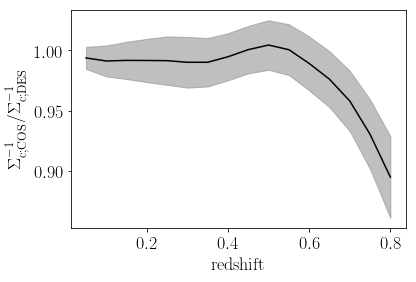

In [3]:
#Read in the Sigma_crit_inverse data
#The "Ratio" variable is the ratio of the true Sigma_crit_inv from COSMOS
#to the measured Sigma_crit_inverse from DES data, thus it encodes
#the photo-z bias.
datapath = "sci_correction.dat"
z, Ratio, Ratioe = np.genfromtxt(datapath, unpack=True)
plt.plot(z, Ratio, c='k')
plt.fill_between(z, Ratio-Ratioe, Ratio+Ratioe, color='gray', alpha=0.5, zorder=-1)
plt.xlabel("redshift")
plt.ylabel(r"$\Sigma_{\rm c;COS}^{-1}/\Sigma_{\rm c;DES}^{-1}$")

In [4]:
#Read in the redshifts for the Y1 cluster stacks
zy1 = np.loadtxt("Y1_meanz.txt")

In [5]:
#Create a spline for the ratio and the error
Ratiospl = interp.interp1d(z,Ratio)# , kind="cubic")
Ratioespl = interp.interp1d(z,Ratioe)#, kind="cubic")

In [6]:
#Sample the ratio and the error at the redshifts of the DES Y1 sample
Ratioy1 = Ratiospl(zy1)
Ratioey1 = Ratioespl(zy1)

In [7]:
#Compute 1+delta(z), which is defined as 1/Ratio, so that it returns
#Also compute the error on delta, computed by propagation
dp1 = 1./Ratioy1 #delta+1
dp1_err = Ratioey1 * dp1**2

In [8]:
#Save the 1+delta data
np.savetxt("Y1_deltap1.txt", dp1)
np.savetxt("Y1_deltap1_var.txt", dp1_err**2)

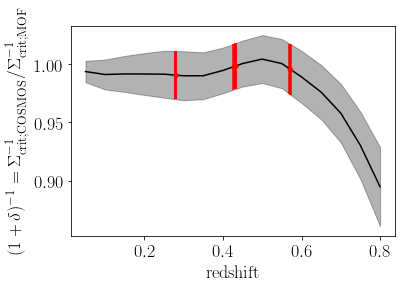

In [9]:
#plt.errorbar(z, Ratio, Ratioe)
plt.plot(z, Ratio, c='k')
plt.fill_between(z, Ratio-Ratioe, Ratio+Ratioe, color='k', alpha=0.3)
plt.errorbar(zy1.flatten(), Ratioy1.flatten(), Ratioey1.flatten(), ls='', marker='.', c='r')
plt.ylabel(r"$(1+\delta)^{-1} = \Sigma_{\rm crit;COSMOS}^{-1}/\Sigma_{\rm crit;MOF}^{-1}$")
plt.xlabel("redshift")
plt.subplots_adjust(bottom=0.15, left=0.15)

Now, we want to print the red points in a table

In [10]:
line = "$%s$ & %.3f \pm %.3f &  %.3f \pm %.3f &  %.3f \pm %.3f \\"
labels = ["[20,30)","[30,45)","[45,60)","[60,\infty)"]
Nz = 3
Nl = 4
for i in range(Nz):
    outline = "$%s$ "%labels[i]
    for jj in range(Nl):
        j = jj+3
        outline +="%.3f \pm %.3f "%(dp1[i,j]-1, dp1_err[i,j])
        if jj < 3:
            outline += "&"
        else:
            outline += "\\"
    print outline

$[20,30)$ 0.009 \pm 0.021 &0.009 \pm 0.021 &0.009 \pm 0.021 &0.009 \pm 0.021 \
$[30,45)$ 0.002 \pm 0.020 &0.002 \pm 0.020 &0.002 \pm 0.020 &0.002 \pm 0.020 \
$[45,60)$ 0.004 \pm 0.022 &0.004 \pm 0.022 &0.004 \pm 0.022 &0.004 \pm 0.022 \
